# Homework 1 - Basic practice in Jupyter and GitHub.

Programming can only be learned by doing. The following exercises blend coding math and text to create clearly defined results. For example, instead of calculating a simple number, you must print the number plus the units (e.g. 24 mg/L). 

### Academic honesty statement

**RAMAKRISHNA SURESH**

Place your academic honesty statement below. Here are some acceptable examples.

-   I worked alone on this assignment.
-   I looked up documentation online for modules like matplotlib, scipy and numpy for syntax and keyword arguments 


# Problem 1: Gas Laws



The virial equation for a gas can be represented as $\frac{PV}{RT} = 1 + \frac{B}{V} + \frac{C}{V^2}$ where $V$ is the molar volume.

For isopropanol $B=-388 cm^3/mol$ and $C=-26,000 cm^6/mol^2$.

We are going to find $V$ for isopropanol at 200 ∘C and 10 bar with a graphical technique.

In this problem $R=83.14 cm^3 bar / (mol K)$.



### Compute V for an ideal gas



The ideal gas law is $1 = \frac{PV}{RT}$. Use this to estimate the volume of isopropanol in the ideal gas state. Print your answer with one decimal place and the printed answer **must include units.**



## A>

## <center> $1= \frac{PV}{RT}$ <br> </center>
    
 solving for V, we get- 
    
## <center>  <br> $V = \frac{RT}{P}$ </center>

In [1]:
# Here we assume that ideal gas is at STP(According to NIST, T=20 degC and P = 1 atm at STP)
#in code, we can simply write it as-
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as scint

Pstandard = 101325 #Pascals
Tstandard = 273.16+20 #Kelvin
Rstandard = 8.3144 # J/mol.K

P = 10 #bar
R = 83.14 #cm^3.bar/mol.K
T = 273.16 + 200
B = - 388 # cm^3/mol
C = -26000 # cm^6/ mol^2
V = Rstandard*Tstandard/Pstandard
print("The volume of isopropanol at STP is %1.5f m^3 per mol"  % (V))
print("or, \n%2.3f Litres per mol" % (V*1000))

The volume of isopropanol at STP is 0.02406 m^3 per mol
or, 
24.056 Litres per mol


In [2]:
# at 200 degC and 10 bar

V = R*T/P

print("The volume of isopropanol at 200 degC and 10 bar is %1.5f cm^3 per mol"  % (V))
print("or, \n%2.3f Litres per mol" % (V/1000))

The volume of isopropanol at 200 degC and 10 bar is 3933.85224 cm^3 per mol
or, 
3.934 Litres per mol


### Compute V for the Virial Gas Law



To do this, create a new function:

$f(V) = \frac{PV}{RT} - 1 - \frac{B}{V} - \frac{C}{V^2} = 0$

and then find values of $V$ where $f(V) = 0$. Start by defining this function and test that it works.Show that your function works by evaluating it for some examples, including an array of volumes.



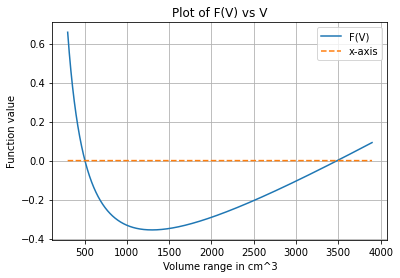

In [37]:
# we define a virial solver function like so
def func1(x,P,T,B,C):
    """
    Virial equation: PV/RT - 1 - B/V - C/V^2
    
    x: input volume 
    
    P: System pressure
    
    T: System Temperature 
    
    B: Constant
    
    C: Another constant
    
    return: F(V)
    
    
    """
    y = x*(P/(R*T)) - 1 - B/x - C/(x**2) 
    
    return y
# P, T, B and C have default values here, but they can be modified if V of some other compound is to be calculated
testv = np.arange(300,3900)
xaxis = testv*0
a = func1(testv,P,T, B, C)

plt.plot(testv, a, label = "F(V)")
plt.plot(testv,xaxis, linestyle = 'dashed', label = "x-axis")
plt.xlabel("Volume range in cm^3")
plt.ylabel("Function value")
plt.title("Plot of F(V) vs V")
plt.legend()
plt.grid(True)

## A>

This graph gives us an approximate idea of where the solutions are. Now, we will individually look at each solutions through the following graphs.

Note- The third solution (Less than zero) has been ignored as volume cannot be negative.

You should make the x-axis sufficiently zoomed in to estimate the solution to about 10 cm<sup>3</sup>.



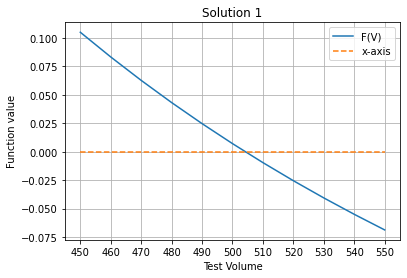

In [38]:
#fig, (ax1, ax2) = plt.subplots(1,2)
testv1 = np.linspace(450,550,11)

testv2 =np.linspace(3450,3550,11)

# For the first solution

plt.plot(testv1,func1(testv1,P,T, B, C), label = "F(V)"); plt.plot(testv1,testv1*0, linestyle = 'dashed', label= "x-axis")
plt.xlabel("Test Volume"); plt.ylabel("Function value"); plt.title("Solution 1");
plt.xticks(testv1)
plt.legend()
plt.grid(True)

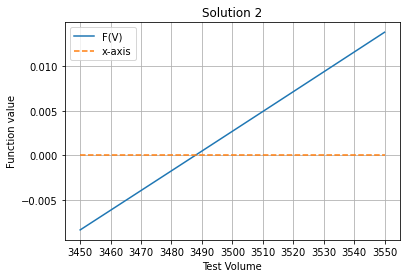

In [39]:
#Fpr the second solution#=
plt.plot(testv2,func1(testv2,P,T, B, C), label = "F(V)"); plt.plot(testv2,testv2*0, linestyle = 'dashed', label = "x-axis")
plt.xlabel("Test Volume"); plt.ylabel("Function value"); plt.title("Solution 2");
plt.xticks(testv2)
plt.legend()
plt.grid(True)

State in words where the solution(s) are.



# A>

- Solution 1 seems to be between 500 and 510
- Solution 2 seems to be between 3480 and 3490.

### Express this in the form of a cubic polynomial in $V$



Derive an alternative expression for f(V) where it is a cubic polynomial of the form $0 = a V^3 + b V^2 + c V + d$. Write this expression in LaTeX, with explicit definitions for the coefficients.



# A>

The given function -

## <center >$\frac{PV}{RT} = 1 + \frac{B}{V} + \frac{C}{V^2}$ </center>

let $\frac{P}{RT}$ be $ I $. Now the equation will look like-

## <center> $ I V = 1 + \frac{B}{V} + \frac{C}{V^2}$ </center>
    
multiplying $ V^2 $ on both the sides, we get- 
    
## <center>    $I V^3 = V^2 + BV + C$ </center>

Rearranging the equation gives us- 

## <center>    $I V^3 - V^2 -BV - C = 0$ </center>

Therefore, the final expression will be- 

## <center>    $V^3 (\frac{P}{RT}) -V^2 -BV - C = 0$ </center>

### <center> where $ a = (\frac{P}{RT}) , b = -1, c = -B, d= -C $ </center>

# Problem 2: Running and plotting an ODE

Most programming is repeative. Once you learn how to run an ODE solver, running it again in the future involves just editing prior code. We discussed the Lorenz equations in class, now we'll run them ourselves. The equations are as follows: 

\begin{align}
\dot{x} & = \sigma(y-x) \\
\dot{y} & = \rho x - y - xz \\
\dot{z} & = -\beta z + xy
\end{align}

These equations are to describe a 2 dimensional layer of fluid that is heat from below and cooled from above. The derivation of these equations is beyond our interest here but can be found easily online. We want to focus on how to simulate such equations.

In the above, x is proportional to the intensity of the convective motion, while y is proportional to the temperature difference between the ascending and descending currents, similar signs of x and y denoting that warm fluid is rising and cold fluid is descending. The variable z is proportional to the distortion of vertical temperature profile from linearity, a positive value indicating that the strongest gradients occur near the boundaries.

Let the parameters be
\begin{align}
\sigma =10\\
\beta =8/3\\
\rho =28\\
\end{align}

We will ignore units for this problem.

In the space below, 
1. Simulate this system with initial conditions of x = y = z = 1. Simulate out to time 1000 and take 0.1 time unit step sizes. Save the necessary results in a matrix.


In [6]:
# Here is our function

def lor(ystate,t,sigma=10,beta=8/3,rho=28):
    """
    lorenz equation: dy/dt = f(t, y)
    
    t: time 
    
    ystate: 3D state vector [x, y, z]
    
    sigma: A constant 
    
    beta: Another constant
    
    rho: Another constant
    
    return: [dxdt, dydt, dzdt] 
    
    
    """
    x, y, z = ystate
     
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
     
    return [dxdt, dydt, dzdt]
    


In [7]:
# For our simulation -

timestep = 0.1  # dt
time = np.arange(0.0,1000.0, timestep) #time span
results =[]

y0 = np.array([1.0 ,1.0 ,1.0])

result = scint.odeint(lor, y0, time)


#print(results)
#np.shape(result)
x = result[:,0]
y = result[:,1]
z = result[:,2]

2. Simulate the system again but with x = y = 1 and z = 0.9999 (precisely). Save the necessary results in a matrix.

In [8]:
y0 = np.array([1.0 ,1.0 , 0.9999])

result2 = scint.odeint(lor, y0, time)


#print(results)
#np.shape(result)
x2 = result2[:,0]
y2 = result2[:,1]
z2 = result2[:,2]

3. On a single plot, plot x vs y from 1 and 2 above. Be sure to label axes.

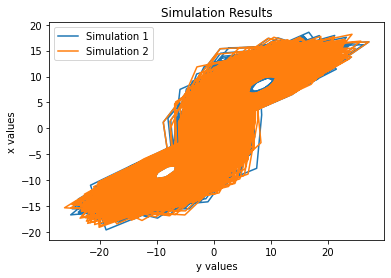

In [9]:
plt.plot(y,x, label = "Simulation 1")
plt.plot(y2,x2, label= "Simulation 2")
plt.xlabel("y values"); plt.ylabel("x values"); plt.title("Simulation Results")
plt.legend()

4. On a single plot, plot x vs z from 1 and 2 above. Be sure to label axes.

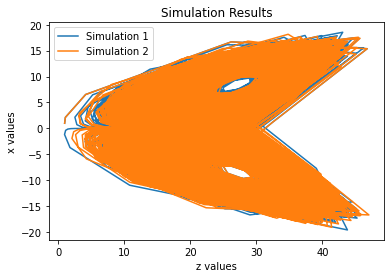

In [10]:
plt.plot(z, x, label = "Simulation 1")
plt.plot(z2, x2, label= "Simulation 2")
plt.xlabel("z values"); plt.ylabel("x values"); plt.title("Simulation Results")
plt.legend()

5. On a single plot, plot x vs time from 1 and 2 above. Be sure to label.

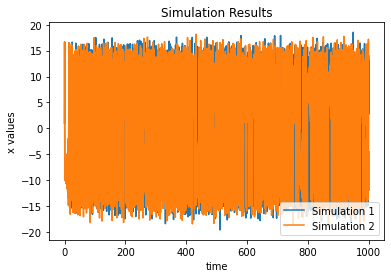

In [11]:
plt.plot(time, x, label = "Simulation 1")
plt.plot(time, x2, label= "Simulation 2")
plt.xlabel("time"); plt.ylabel("x values"); plt.title("Simulation Results")
plt.legend()

6. After completing all simulations, comment on how changing the initial value of z by 0.01% impacted the simulation outcomes. Be sure to use a Markdown cell for this.

**Write your answer here.**

We can se that a change from 1 to 0.9999 (A change of 0.01%) is enough to cause a significant difference in the simulation outcomes. The following graphs are comparing the values of simulation 1 with simulation 2. We can clearly see that the values come out to be drastically different.

Text(0.5, 1.0, 'Value comparison x')

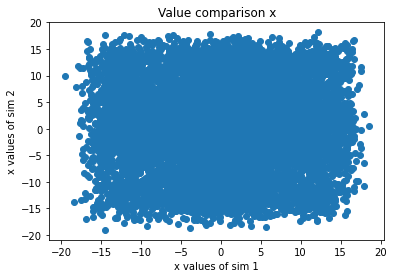

In [12]:
plt.scatter(x,x2)
plt.xlabel("x values of sim 1"); plt.ylabel("x values of sim 2"); plt.title("Value comparison x")
#print(errx, errx*errx)
         

Text(0.5, 1.0, 'Value comparison y')

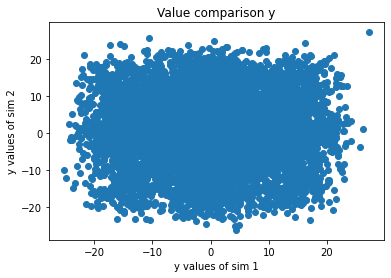

In [13]:
plt.scatter(y,y2)
plt.xlabel("y values of sim 1"); plt.ylabel("y values of sim 2"); plt.title("Value comparison y")

Text(0.5, 1.0, 'Value comparison z')

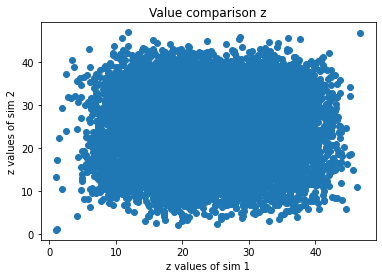

In [14]:
plt.scatter(z,z2)
plt.xlabel("z values of sim 1"); plt.ylabel("z values of sim 2"); plt.title("Value comparison z")

# Problem 3 - Reading COVID data and Prediction

I hope I mentioned in class that when it comes to addressing engineering questions computationally, you will often be expected to learn on your own. This means using google or what have you and searching for specific libraries that can help solve the problem at hand. 

Here, I have provided some data that I pulled from the New York Time's GitHub COVID-19 data repository. The file is called florida.csv and contains COVID outbreak data specific to Florida. The data contains: the week since the start of the outbreak, the 7 day sliding average of the number of COVID positive cases and the 7 day sliding average of the number of deaths reported.

In the cell below, write the code necessary to load this data into the workspace and give the resulting array the name "dat". The numpy.genfromtxt function may be helpful.

In [15]:
import pandas as pd


dat = pd.read_csv(r"C:\Users\srks9\OneDrive\Documents\Sem 1\Math methods\florida.csv")
  
dat
#np.genfromtxt(r"C:\Users\srks9\OneDrive\Documents\Sem 1\Math methods\florida.csv")


,week,cases_avg,deaths_avg
0,1,0.29,0.00
1,2,0.29,0.00
2,3,0.43,0.00
3,4,0.43,0.00
4,5,0.57,0.00
...,...,...,...
536,537,23792.86,201.29
537,538,21534.29,212.29
538,539,23313.86,212.29
539,540,23313.86,212.29


Next, make a points plot with the average number of cases on the x axis and the average number of deaths on the y axis. Have the color of the points change according to the week of the infection. There are a lot of ways to generate such a plot. Consider matlibplot and ggplot2. After plotting, create a markdown cell and comment on the how these two features have evolved in time.

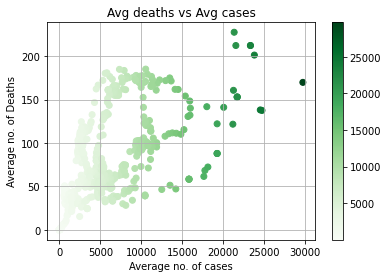

In [40]:
plt.scatter(dat['cases_avg'], dat['deaths_avg'], c = dat['cases_avg'], cmap = 'Greens')
plt.xlabel("Average no. of cases"); plt.ylabel("Average no. of Deaths"); plt.title("Avg deaths vs Avg cases");
plt.colorbar()
plt.grid(True)

**Put Commentary here:**

To see how these values have evolved over time, we can see that through the following graphs-

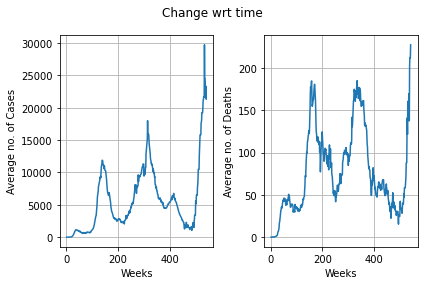

In [36]:
fig, ax = plt.subplots(1,2)

ax[0].plot(dat['week'], dat['cases_avg']); ax[0].set_xlabel("Weeks"); ax[0].set_ylabel("Average no. of Cases"); ax[0].grid(True)
ax[1].plot(dat['week'], dat['deaths_avg']); ax[1].set_xlabel("Weeks"); ax[1].set_ylabel("Average no. of Deaths"); ax[1].grid(True)

fig.suptitle("Change wrt time")
fig.tight_layout()
plt.show()

Observations:

- We can see that both the average number of cases oscillate wrt time. The cases and the deaths follow a similar pattern because a covid related death requires that person to be infected first. 

- The number of deaths are fairly consistent despite there being a higher total number of cases during each oscillation cycle. This might mean that the ratio of avg deaths vs avg cases shows a slight decrease over time. 

- There exists a "Phase difference" in this oscillation pattern, i.e., the trough in the avg. no. of deaths comes a few weeks after the dip in the avg. no. of cases. 

One goal of every scientist should be to use data for predictions. Here, we'll use this goal as a chance to practice for loops. 

Ideally, in a world without delays and nonlinearities, the best way to predict an outcome is with a linear model, aka a straight line. Right a "for loop" which adds 4 straight lines to our plot of average infection and average mortality. Each line should have an intercept at zero and a slope of 0.001, 0.01, 0.1 and 1. 

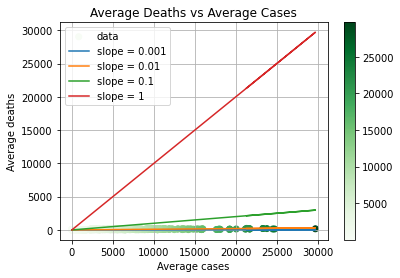

In [41]:
# plotting using a for loop.
slopes = [0.001, 0.01, 0.1, 1]

plt.scatter(dat['cases_avg'], dat['deaths_avg'], label = 'data', c = dat['cases_avg'], cmap = 'Greens')
for i in slopes:
    plt.plot(dat['cases_avg'],dat['cases_avg']*i, label = f'slope = {i}')

plt.xlabel("Average cases"); plt.ylabel("Average deaths"); plt.title("Average Deaths vs Average Cases")
plt.legend()
plt.colorbar()
plt.grid(True)

Here we can see that the lines drawn using for loop squeeze the data to the bottom of the graph because of the large y values of the line with a slope of 1. Thus, a new graph has been made where all the lines are clearly visible and the best fit line has been noted.

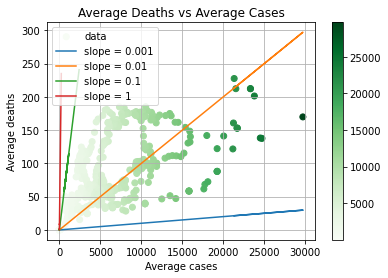

In [42]:
plt.scatter(dat['cases_avg'], dat['deaths_avg'], label = 'data', c = dat['cases_avg'], cmap = 'Greens')
plt.plot(dat['cases_avg'],dat['cases_avg']*0.001, label = 'slope = 0.001')
plt.plot(dat['cases_avg'],dat['cases_avg']*0.01 , label = 'slope = 0.01')
plt.plot(dat['cases_avg'][0:110],dat['cases_avg'][0:110]*0.1, label = 'slope = 0.1')
plt.plot(dat['cases_avg'][0:25],dat['cases_avg'][0:25]*1, label = 'slope = 1')
plt.xlabel("Average cases"); plt.ylabel("Average deaths"); plt.title("Average Deaths vs Average Cases")
plt.legend()
plt.colorbar()
plt.grid(True)

Using just your eyes, which straight line seems to best fit the data? What does best fit mean? 

The line which fits the given data best is the one with a slope of 0.01. But this is just eye check. Ideally, best fit would mean that the difference between the points on the line and that of the actual data is at a minimum. (Can be calculated using the least squares method)

# Problem 4 Github

- Create a github repository called "Che_Math".
- Create a read me file that explain that this repository will include code related to homeworks and projects from this course.
- Push this homework assignment to your repository.
- Enter the link you your repository here:


**Upload your jupyter notebook to Canvas for grading. Thank you!